## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_number=merge_df["Mouse ID"].unique()
print(len(mice_number))
merge_df["Mouse ID"].nunique()

249


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_Mouse_ID = both.loc[merge_df(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
#duplicate_Mouse_ID = pd.DataFrame(merge_df, columns = ['Mouse ID', 'Timepoint'])
print(duplicated_mouse_id)
#df_duplicates_removed = pd.DataFrame.drop_duplicates(duplicate_Mouse_ID)
#print(df_duplicates_removed)
#merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"],keep=False)]
df_duplicate_Mouse_ID = merge_df.loc[merge_df["Mouse ID"] == "g989"]
df_duplicate_Mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
acceptable_observations = merge_df.loc[merge_df["Mouse ID"] != "g989"]
acceptable_observations

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(acceptable_observations)

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_regimen = acceptable_observations.groupby("Drug Regimen")
grouped_by_regimen.head()
#print(len(grouped_by_regimen))
a=grouped_by_regimen["Tumor Volume (mm3)"].mean()
b=grouped_by_regimen["Tumor Volume (mm3)"].median()
c=grouped_by_regimen["Tumor Volume (mm3)"].var()
d=grouped_by_regimen["Tumor Volume (mm3)"].std()
e=grouped_by_regimen["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_by_regimen_summary = pd.DataFrame({
                                    "Mean" : a,
                                  "Median" : b, 
                                "Variance" : c, 
                                "Standard Deviation" : d,
                                "SEM" : e, 
                                         })
grouped_by_regimen_summary.sort_values("Median", ascending=True)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
##grouped_by_regimen.(["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
grouped_by_regimen.agg({"Tumor Volume (mm3)" :["mean", "median", "var","std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

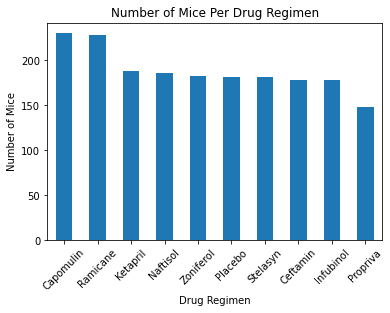

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
f=acceptable_observations["Drug Regimen"].value_counts()
type(f)
f.plot(kind="bar")
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)

([<matplotlib.axis.XTick at 0x194dfed0cc8>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

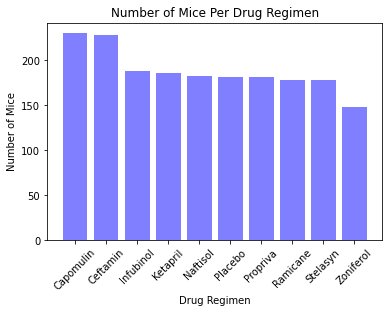

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x = [i for i in range(0,len(f))]
x
plt.bar(x, f, color='b', alpha=0.5, align="center")
#plt.xticks(rotation)
plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#plt.xticks(rotation=0)
tick_locations = [i for i in x]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
                            'Stelasyn', 'Zoniferol'],  rotation='45')


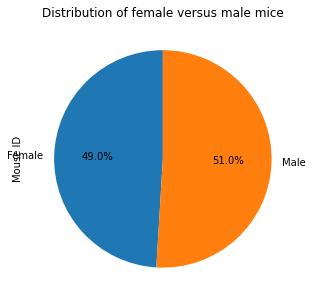

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = acceptable_observations.groupby("Sex").count()["Mouse ID"]
genderpieplot = gender.plot.pie(y='Sex',figsize=(5, 5),autopct='%1.1f%%', startangle=90, 
                                title="Distribution of female versus male mice")

([<matplotlib.patches.Wedge at 0x194e007ae88>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Male'),
  Text(1.0995024239828841, 0.033082014082615026, 'Female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

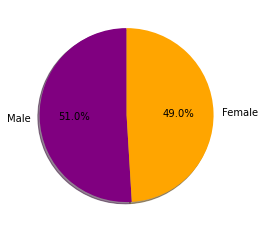

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = acceptable_observations["Sex"].value_counts()
labels = acceptable_observations["Sex"].unique()
colors = ["purple", "orange"]
explode = (0.01, 0, 0, 0)
plt.pie(sizes,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
g=acceptable_observations.groupby("Mouse ID")["Timepoint"].max()
g = g.reset_index()
print(g)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_obs = g.merge(acceptable_observations,on=["Mouse ID", "Timepoint"],how="left")
last_obs

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
h=acceptable_observations["Drug Regimen"].unique()
h
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
lowerbound = []
upperbound = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in h:
    print(drug)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = last_obs.loc[last_obs["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol.append(final_tumor)

    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - 1.5*iqr
    upperbound = upperq + 1.5*iqr
    outliers = final_tumor.loc[(final_tumor < lowerbound) | (final_tumor > upperbound)]
    print(outliers)

Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Placebo
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn
Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril
Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva
Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol
Series([], Name: Tumor Volume (mm3), dtype: float64)


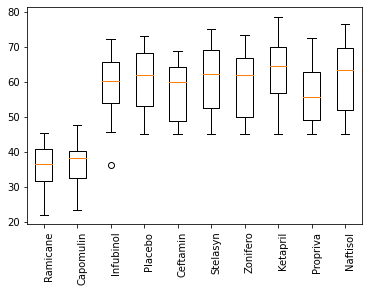

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#for drug in h:   
#    #print(tumor_vol)
#    print(drug)
    #print(final_tumor)
#    print("The iqr is: " ,iqr)
#    print("The lower q is: ", lowerq)
#    print("The lowerbound is: ",lowerbound)
#    print("The upper q is: ", upperq)
#    print("The upperbound is: ",upperbound)
    
drugs_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
#plt.boxplot(tumor_vol, labels=drugs_of_interest)
#for drug in drugs_of_interest:
ax1.boxplot(tumor_vol)
    #plt.ylim(-100, 10000)
plt.xticks(range(1,11), ["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Stelasyn",
                         "Zonifero","Ketapril","Propriva","Naftisol"],  rotation='vertical',ha="left")
plt.show()

## Line and Scatter Plots

   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
30     m601    Capomulin  Male          22          17          0   
31     m601    Capomulin  Male          22          17          5   
32     m601    Capomulin  Male          22          17         10   
33     m601    Capomulin  Male          22          17         15   
34     m601    Capomulin  Male          22          17         20   
35     m601    Capomulin  Male          22          17         25   
36     m601    Capomulin  Male          22          17         30   
37     m601    Capomulin  Male          22          17         35   
38     m601    Capomulin  Male          22          17         40   
39     m601    Capomulin  Male          22          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
30           45.000000                 0  
31           41.408591                 1  
32           36.825367                 1  
33           35.464612                 1  
34           34.255732   

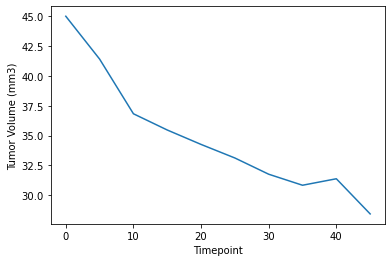

In [85]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = acceptable_observations.loc[acceptable_observations["Mouse ID"] == "m601",:]
#if "Mouse ID" == "m601":
x_values = line_df["Timepoint"]
y_values = line_df["Tumor Volume (mm3)"]
print(line_df)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_values, y_values)
plt.show()

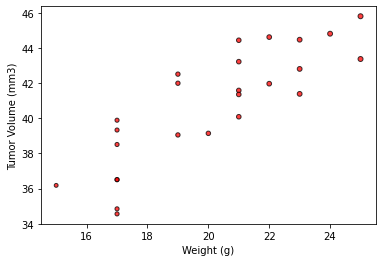

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_mass = acceptable_observations.loc[acceptable_observations["Drug Regimen"] == "Capomulin",:]
#if "Mouse ID" == "m601":
mice_mass = mice_mass.groupby(['Mouse ID']).mean()
x_values = mice_mass["Weight (g)"]
y_values = mice_mass["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            s=x_values, alpha=0.75)

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lr_model=st.linregress(mice_mass['Weight (g)'],mice_mass['Tumor Volume (mm3)'])
lr_model

LinregressResult(slope=0.9544396890241047, intercept=21.55216053268501, rvalue=0.8419363424694719, pvalue=1.3225722434712642e-07, stderr=0.12754359033201335)

Text(0.5, 1.0, 'Mice Weight vs Avg Tumor Volumes for Capomulin Regimen')

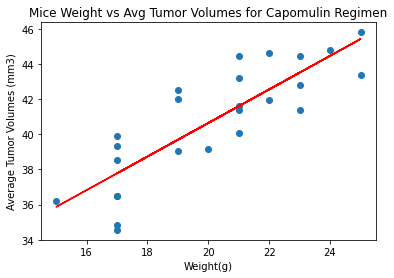

In [103]:
lr_slope = 0.9544396890241045 
lr_intercept= 21.552160532685015

y_values = mice_mass['Weight (g)']*lr_slope+lr_intercept
plt.scatter(mice_mass['Weight (g)'],mice_mass['Tumor Volume (mm3)'])

plt.plot(mice_mass['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volumes (mm3)')
plt.title('Mice Weight vs Avg Tumor Volumes for Capomulin Regimen')
